In [1]:
import urllib.request
import xml.etree.ElementTree
from PIL import Image
import time
import pandas as pd
from IPython.display import display

In [2]:
book_df = pd.read_excel('/home/vidhi/Documents/quills_titles.xlsx')

In [3]:
book_df.describe()

,Name,Author
count,2010,1847
unique,1898,928
top,The Da Vinci Code,-
freq,6,115


--------------- Harry Potter and the Deathly Hallows ---------------
Harry Potter is leaving Privet Drive for the last time. But as he climbs into the sidecar of Hagrid’s motorbike and they take to the skies, he knows Lord Voldemort and the Death Eaters will not be far behind.<br /><br />The protective charm that has kept him safe until now is broken. But the Dark Lord is breathing fear into everything he loves. And he knows he can’t keep hiding.<br /><br />To stop Voldemort, Harry knows he must find the remaining Horcruxes and destroy them.<br /><br />He will have to face his enemy in one final battle.<br />--jkrowling.com
4.63


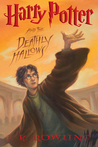

--------------- The Book Thief ---------------
It is 1939. Nazi Germany. The country is holding its breath. Death has never been busier, and will be busier still.<br /><br />By her brother's graveside, Liesel's life is changed when she picks up a single object, partially hidden in the snow. It is The Gravedigger's Handbook, left behind there by accident, and it is her first act of book thievery. So begins a love affair with books and words, as Liesel, with the help of her accordian-playing foster father, learns to read. Soon she is stealing books from Nazi book-burnings, the mayor's wife's library, wherever there are books to be found.<br /><br />But these are dangerous times. When Liesel's foster family hides a Jew in their basement, Liesel's world is both opened up, and closed down.<br /><br />In superbly crafted writing that burns with intensity, award-winning author Markus Zusak has given us one of the most enduring stories of our time.
4.37


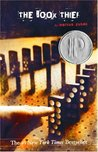

--------------- 1984' ---------------
<i>Alternate cover edition of ASIN B003JTHWKU<br />For previous cover edition see <a href="https://www.goodreads.com/book/show/9577857-1984" rel="nofollow">here</a></i><br /><br />Among the seminal texts of the 20th century, <i>Nineteen Eighty-Four</i> is a rare work that grows more haunting as its futuristic purgatory becomes more real. Published in 1949, the book offers political satirist George Orwell's nightmarish vision of a totalitarian, bureaucratic world and one poor stiff's attempt to find individuality. The brilliance of the novel is Orwell's prescience of modern life--the ubiquity of television, the distortion of the language--and his ability to construct such a thorough version of hell. Required reading for students since it was published, it ranks among the most terrifying novels ever written.
4.17


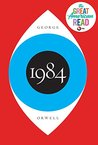

--------------- Atlas Shrugged ---------------
<b>This is the story of a man who said that he would stop the motor of the world and did. Was he a destroyer or the greatest of liberators?</b><br /><br />Why did he have to fight his battle, not against his enemies, but against those who needed him most, and his hardest battle against the woman he loved? What is the world’s motor — and the motive power of every man? You will know the answer to these questions when you discover the reason behind the baffling events that play havoc with the lives of the characters in this story. <br /><br />Tremendous in its scope, this novel presents an astounding panorama of human life — from the productive genius who becomes a worthless playboy — to the great steel industrialist who does not know that he is working for his own destruction — to the philosopher who becomes a pirate — to the composer who gives up his career on the night of his triumph — to the woman who runs a transcontinental railroad — to

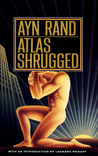

--------------- Only time will tell ---------------
<b>
  <blockquote>From the internationally bestselling author of <i>Kane and Abel</i> and <i>A Prisoner of Birth</i> comes <i>Only Time Will Tell</i>, the first in an ambitious new series that tells the story of one family across generations, across oceans, from heartbreak to triumph.</blockquote>
</b>The epic tale of Harry Clifton’s life begins in 1920, with the words “I was told that my father was killed in the war.” A dock worker in Bristol, Harry never knew his father, but he learns about life on the docks from his uncle, who expects Harry to join him at the shipyard once he’s left school. But then an unexpected gift wins him a scholarship to an exclusive boys’ school, and his life will never be the same again.<p>As he enters into adulthood, Harry finally learns how his father really died, but the awful truth only leads him to question, was he even his father? Is he the son of Arthur Clifton, a stevedore who spent his whole life o

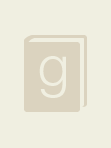

--------------- Chronicles Of narnia ---------------
Journeys to the end of the world, fantastic creatures, and epic battles between good and evil—what more could any reader ask for in one book? The book that has it all is <i>The Lion, the Witch and the Wardrobe</i>, written in 1949 by Clive Staples Lewis. But Lewis did not stop there. Six more books followed, and together they became known as <i>The Chronicles of Narnia.</i><br /><br />For the past fifty years, <i>The Chronicles of Narnia</i> have transcended the fantasy genre to become part of the canon of classic literature. Each of the seven books is a masterpiece, drawing the reader into a land where magic meets reality, and the result is a fictional world whose scope has fascinated generations.<br /><br />This edition presents all seven books—unabridged—in one impressive volume. The books are presented here in chronlogical order, each chapter graced with an illustration by the original artist, Pauline Baynes. Deceptively simple a

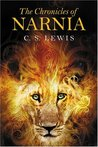

--------------- Twilight ---------------
<b>About three things I was absolutely positive.<br /><br />First, Edward was a vampire.<br /><br />Second, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.<br /><br />And third, I was unconditionally and irrevocably in love with him.</b><br /><br />In the first book of the Twilight Saga, internationally bestselling author Stephenie Meyer introduces Bella Swan and Edward Cullen, a pair of star-crossed lovers whose forbidden relationship ripens against the backdrop of small-town suspicion and a mysterious coven of vampires. This is a love story with bite.
3.58


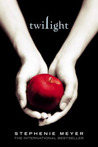

--------------- The Monk who sold his ferrari ---------------
<p>After a bizarre encounter with his lost cousin, Julian Mantle— a former high-powered lawyer who suddenly vanished into the Himalayas— Jonathan Landry is compelled to travel across the planet to retrieve letters and mementos that carry the extraordinary secrets that Julian discovered throughout his life. On a remarkable journey that includes visits to the sensual tango halls of Buenos Aires, the haunting catacombs of Paris, the gleaming towers of Shanghai and the mystical deserts of Sedona, <em>The Secret Letters of The Monk Who Sold His Ferrari</em> reveals astounding insights on reclaiming your personal power, being true to yourself and fearlessly living your dreams.</p>
4.00


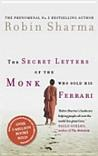

--------------- celebrating silence ---------------
None
4.71


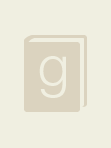

--------------- Alchemist ---------------
Paulo Coelho's masterpiece tells the mystical story of Santiago, an Andalusian shepherd boy who yearns to travel in search of a worldly treasure. His quest will lead him to riches far different—and far more satisfying—than he ever imagined. Santiago's journey teaches us about the essential wisdom of listening to our hearts, of recognizing opportunity and learning to read the omens strewn along life's path, and, most importantly, to follow our dreams.
3.85


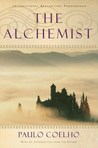

--------------- Don't lose your mind, lose your weight  ---------------
None
4.14


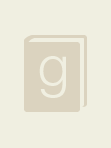

KeyboardInterrupt: 

In [5]:
for book_name in book_df['Name']:
    url = 'https://www.goodreads.com/book/title.xml?author=&key=Vc273zJAMGN6VpPQKn4g&title='+book_name
    url = url.replace(' ', '+')
    contents = urllib.request.urlopen(url)
    e = xml.etree.ElementTree.parse(contents).getroot()
    print('-'*15, book_name, '-'*15)
    print(e.find('book').find('description').text)
    print(e.find('book').find('average_rating').text)
    img_url = e.find('book').find('image_url').text
    img = urllib.request.urlopen(img_url)
    x = Image.open(img)
    display(x)
    time.sleep(1)